In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [2]:
train_data = pd.read_csv("fraudTrain.csv")

In [3]:
# For displaying complete columns.
pd.options.display.max_columns = None

In [4]:
train_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
categorys = train_data['category'].value_counts()
categorys

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

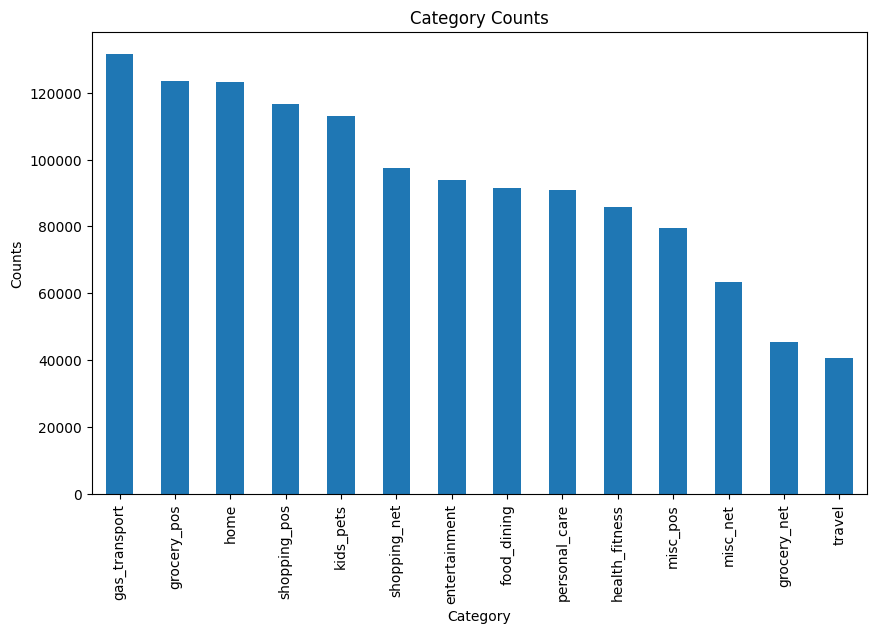

In [7]:
plt.figure(figsize=(10,6))
categorys.plot(kind='bar')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.show()

In [8]:
train_data['merchant'].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [9]:
# Transforming string into numerical values
labelencoder = LabelEncoder()

train_data['category'] = labelencoder.fit_transform(train_data['category'])

In [10]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,9,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
train_data.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num','merchant','first','last','gender','street','city','state','zip','lat','long','city_pop','job','trans_num','unix_time'], inplace=True)

In [12]:
train_data["age"] = train_data["dob"].apply(lambda x: (datetime.now() - datetime.strptime(x, '%Y-%m-%d')).days // 365)

In [13]:
test_data = pd.read_csv("fraudTest.csv")

In [14]:
test_data.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num','merchant','first','last','gender','street','city','state','zip','lat','long','city_pop','job','trans_num','unix_time'], inplace=True)

In [15]:
test_data.head()

,category,amt,dob,merch_lat,merch_long,is_fraud
0,personal_care,2.86,1968-03-19,33.986391,-81.200714,0
1,personal_care,29.84,1990-01-17,39.450498,-109.960431,0
2,health_fitness,41.28,1970-10-21,40.495810,-74.196111,0
3,misc_pos,60.05,1987-07-25,28.812398,-80.883061,0
4,travel,3.19,1955-07-06,44.959148,-85.884734,0


In [16]:
test_data["age"] = train_data["dob"].apply(lambda x: (datetime.now() - datetime.strptime(x, '%Y-%m-%d')).days // 365)

In [17]:
test_data.head()

,category,amt,dob,merch_lat,merch_long,is_fraud,age
0,personal_care,2.86,1968-03-19,33.986391,-81.200714,0,36
1,personal_care,29.84,1990-01-17,39.450498,-109.960431,0,46
2,health_fitness,41.28,1970-10-21,40.495810,-74.196111,0,62
3,misc_pos,60.05,1987-07-25,28.812398,-80.883061,0,57
4,travel,3.19,1955-07-06,44.959148,-85.884734,0,38


In [18]:
train_data.drop(columns=['dob'], inplace=True)
test_data.drop(columns=['dob'], inplace=True)

In [19]:
test_data['category'] = labelencoder.fit_transform(test_data['category'])

In [20]:
train_data.head()

,category,amt,merch_lat,merch_long,is_fraud,age
0,8,4.97,36.011293,-82.048315,0,36
1,4,107.23,49.159047,-118.186462,0,46
2,0,220.11,43.150704,-112.154481,0,62
3,2,45.00,47.034331,-112.561071,0,57
4,9,41.96,38.674999,-78.632459,0,38


In [21]:
test_data.head()

,category,amt,merch_lat,merch_long,is_fraud,age
0,10,2.86,33.986391,-81.200714,0,36
1,10,29.84,39.450498,-109.960431,0,46
2,5,41.28,40.495810,-74.196111,0,62
3,9,60.05,28.812398,-80.883061,0,57
4,13,3.19,44.959148,-85.884734,0,38


In [22]:
x_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

In [23]:
x_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# making Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [31]:
# Calculating Results
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy:  0.9999976863901903
Test Accuracy:  0.9971100502232243
Confusion Matrix:
 [[552855    719]
 [   887   1258]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.64      0.59      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.82      0.79      0.80    555719
weighted avg       1.00      1.00      1.00    555719

